In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

initial_model_state = copy.deepcopy(model) 
for j in range(300):
    model.step()

There are 0 agents unassigned!!
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
neighbor is rijk en neemt land over
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
neighbor is rijk en neemt land over
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
neighbor is rijk en ne

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births,Rice agents,Annual crops agents
0,0.000000,1000,0,0,0,0,0,66,29
1,0.000000,1000,0,0,0,0,0,66,29
2,0.000000,1000,0,0,0,0,0,66,29
3,0.000000,1000,0,0,0,0,0,66,29
4,0.000000,1000,0,0,0,0,0,66,29
...,...,...,...,...,...,...,...,...,...
320,0.783371,775,74,291,31,113,210,34,7
321,0.783371,775,74,291,31,113,210,34,7
322,0.785412,775,74,291,31,113,210,34,7
323,0.785412,775,74,291,31,113,210,34,7


In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()

agent_savings = agent_data[agent_data['Savings'].notna()]
agent_savings


Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
1    1001             Rice         small  2.000000e+07             NaN   
     1002             Rice         small  2.000000e+07             NaN   
     1003             Rice         large  2.000000e+07             NaN   
     1004     Annual crops        medium  2.000000e+07             NaN   
     1005     Annual crops        medium  2.000000e+07             NaN   
...                    ...           ...           ...             ...   
300  1272             None          None  3.096205e+09             0.0   
     1273             None          None  3.859265e+09             0.0   
     1274             None          None  6.591833e+09             0.0   
     1275             None          None  3.162048e+09             0.0   
     1277             None          None  3.319926e+09             0.0   

              Number_of_wage_workers  Debt ratio  
Step AgentID                                      
1    1001                        NaN         NaN  
     1002                        NaN         NaN  
     1003                        NaN         NaN  
     1004                        NaN         NaN  
     1005                        NaN         NaN  
...                              ...         ...  
300  1272                        NaN         NaN  
     1273                        NaN         NaN  
     1274                        NaN         NaN  
     1275                        NaN         NaN  
     1277                        NaN         NaN  

[65146 rows x 6 columns]

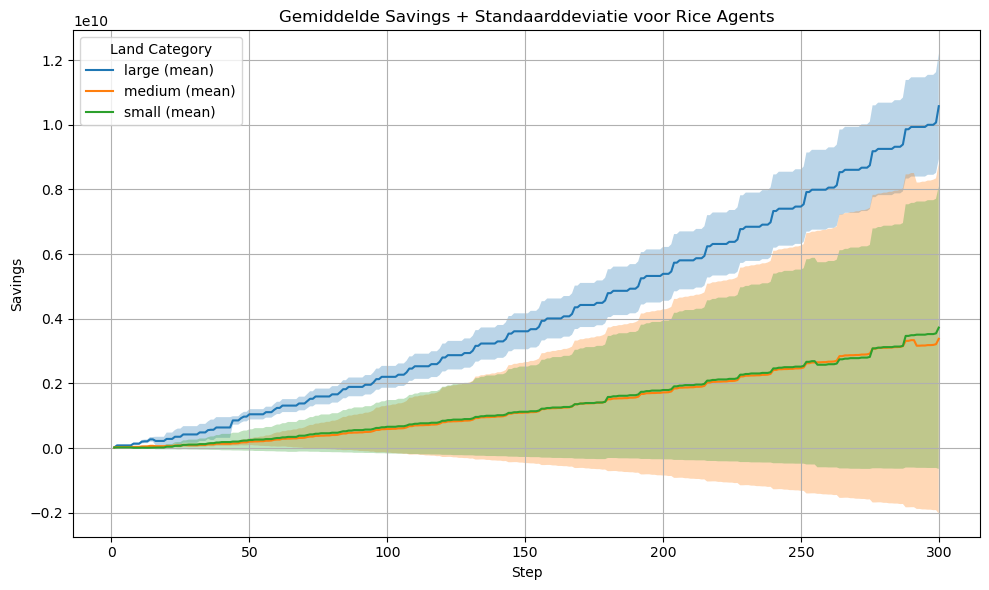

In [ ]:
rice_income_data = agent_data
import matplotlib.pyplot as plt
import pandas as pd


rice_income_data = rice_income_data.reset_index()

rice_df = rice_income_data[rice_income_data["Crop_type"] == "Rice"]

mean_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].mean().unstack()
std_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].std().unstack()

plt.figure(figsize=(10,6))
for category in mean_savings.columns:
    mean = mean_savings[category]
    std = std_savings[category]
    
    plt.plot(mean.index, mean.values, label=f"{category} (mean)")
    plt.fill_between(mean.index, mean - std, mean + std, alpha=0.3)

plt.title("Gemiddelde Savings + Standaarddeviatie voor Rice Agents")
plt.xlabel("Step")
plt.ylabel("Savings")
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()




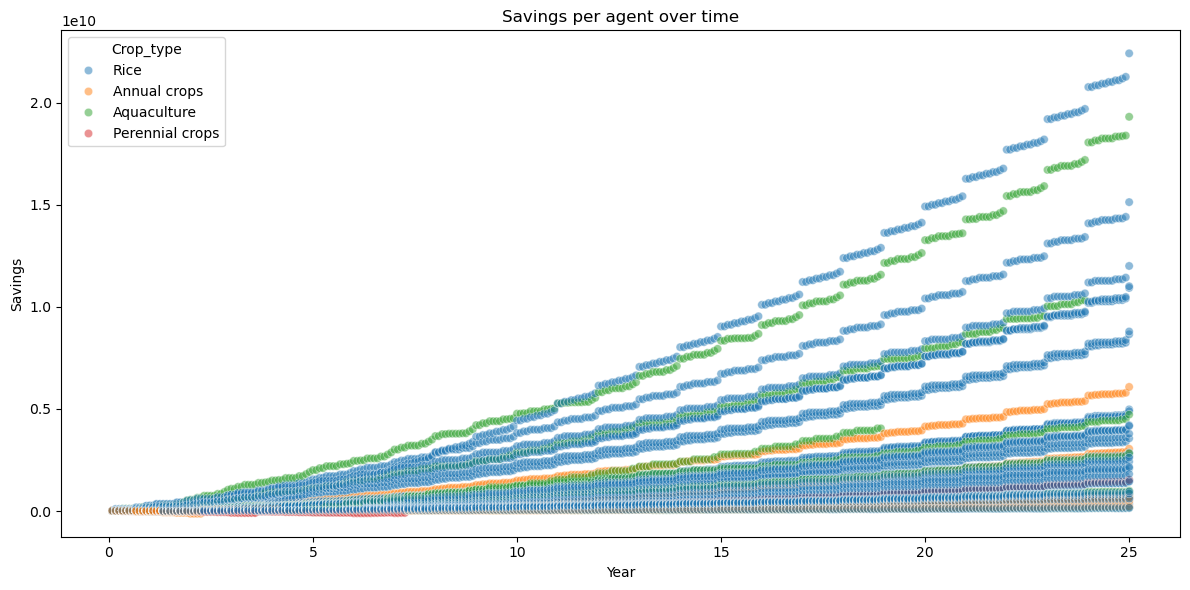

In [22]:
# agent_savings = agent_savings[agent_savings['Crop_type'].notna()]


agent_savings = agent_savings.reset_index() 
agent_savings['Year'] = agent_savings['Step'] / 12

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=agent_savings, x='Year', y='Savings', hue='Crop_type', alpha=0.5)
plt.title("Savings per agent over time")
plt.ylabel("Savings")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

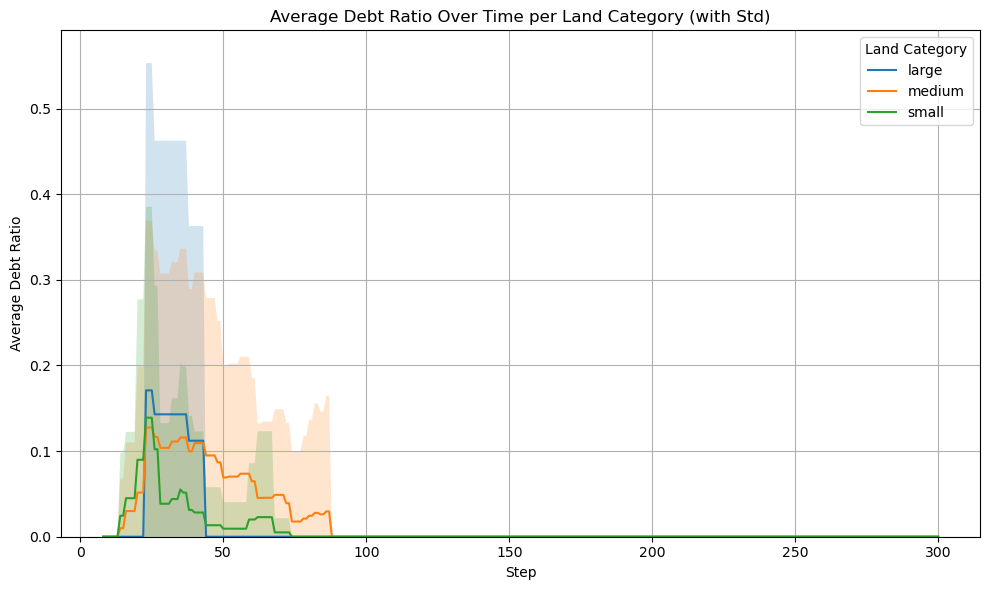

In [9]:
debt_data = agent_data
debt_data = debt_data[debt_data['Debt ratio'].notna()]
import matplotlib.pyplot as plt

# Gemiddelde en standaarddeviatie berekenen
grouped = debt_data.groupby(['Step', 'Land_category'])['Debt ratio']
mean_debt = grouped.mean().unstack()
std_debt = grouped.std().unstack()

# Plot
plt.figure(figsize=(10, 6))

for category in mean_debt.columns:
    plt.plot(mean_debt.index, mean_debt[category], label=category)
    plt.fill_between(
        mean_debt.index,
        mean_debt[category] - std_debt[category],
        mean_debt[category] + std_debt[category],
        alpha=0.2
    )

plt.title("Average Debt Ratio Over Time per Land Category (with Std)")
plt.xlabel("Step")
plt.ylabel("Average Debt Ratio")
plt.ylim(bottom=0)
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()


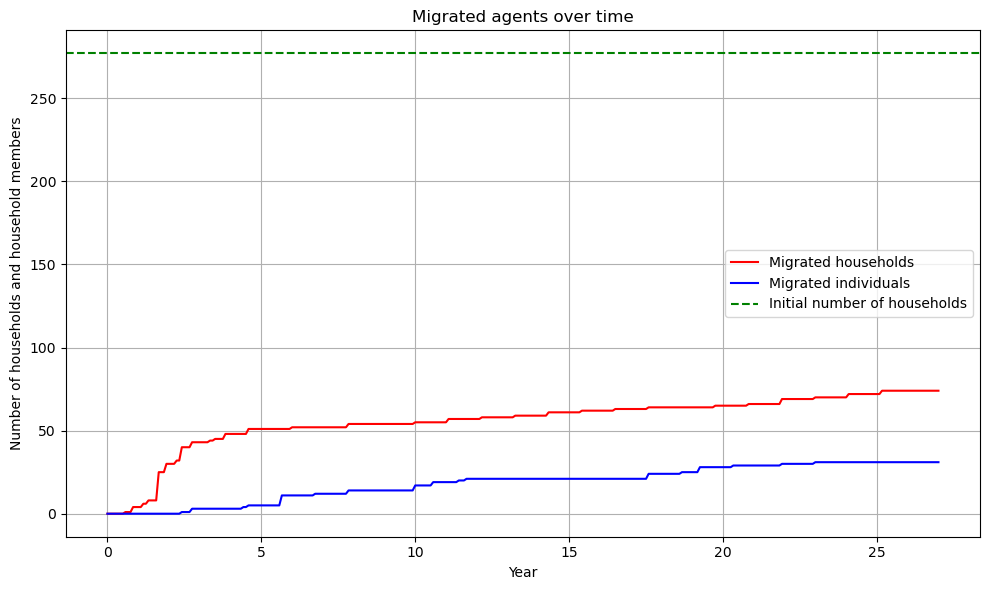

In [23]:
import matplotlib.pyplot as plt

debt_model_data = model_data.copy()
years = debt_model_data.index / 12  

start_households = model.start_households  

plt.figure(figsize=(10, 6))

plt.plot(years, debt_model_data['Migrated_households'], label='Migrated households', color='red')
plt.plot(years, debt_model_data['Migrated_individuals'], label='Migrated individuals', color='blue')

plt.axhline(y=start_households, color='green', linestyle='--', label='Initial number of households')

plt.xlabel('Year')
plt.ylabel('Number of households and household members')
plt.title('Migrated agents over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



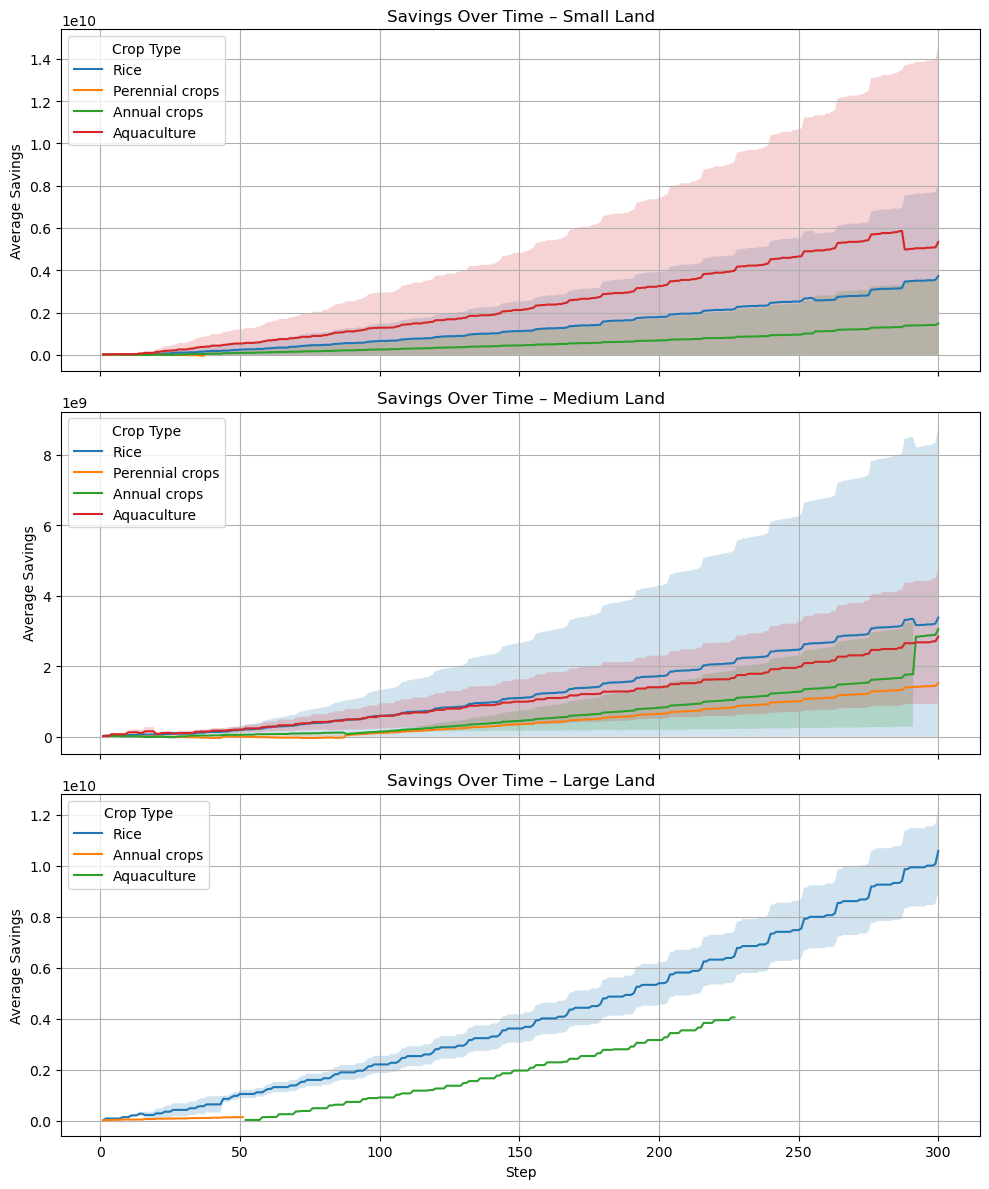

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_savings = agent_data
df_filtered = df_savings.dropna(subset=['Crop_type', 'Land_category', 'Savings'])

land_categories = ['small', 'medium', 'large']
crop_types = ['Rice', 'Perennial crops', 'Annual crops', 'Aquaculture']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

for i, land in enumerate(land_categories):
    ax = axes[i]
    df_land = df_filtered[df_filtered['Land_category'] == land]
    
    for crop in crop_types:
        df_crop = df_land[df_land['Crop_type'] == crop]
        if df_crop.empty:
            continue

        grouped = df_crop.groupby('Step')['Savings']
        mean = grouped.mean()
        std = grouped.std()

        ax.plot(mean.index, mean.values, label=crop)
        ax.fill_between(
            mean.index,
            np.maximum(0, mean - std),  
            mean + std,
            alpha=0.2
        )
    
    ax.set_title(f"Savings Over Time – {land.capitalize()} Land")
    ax.set_ylabel("Average Savings")
    ax.grid(True)
    ax.legend(title="Crop Type")

axes[-1].set_xlabel("Step")
plt.tight_layout()
plt.show()



In [12]:
ww_data = agent_data
ww_data = ww_data[ww_data['Number_of_wage_workers'].notna()]
ww_data

Crop_type Land_category       Savings  too low income  \
Step AgentID                                                         
2    1001         Rice         small  2.052319e+07             NaN   
     1002         Rice         small  2.216671e+07             NaN   
     1003         Rice         large  6.085474e+07             NaN   
     1007         Rice         large  9.883799e+07             NaN   
     1010         Rice         large  9.286346e+07             NaN   
...                ...           ...           ...             ...   
300  1092         Rice         large  1.200106e+10             NaN   
     1098         Rice         small  4.166853e+09             NaN   
     1102         Rice         small  1.728749e+08             NaN   
     1103         Rice         small  1.100582e+10             NaN   
     1105         Rice         small  9.572102e+08             NaN   

              Number_of_wage_workers  Debt ratio  
Step AgentID                                      
2    1001                        4.0         NaN  
     1002                        0.0         NaN  
     1003                       67.0         NaN  
     1007                      153.0         NaN  
     1010                      138.0         NaN  
...                              ...         ...  
300  1092                      195.0         0.0  
     1098                       24.0         0.0  
     1102                        3.0         0.0  
     1103                      120.0         0.0  
     1105                        7.0         0.0  

[17053 rows x 6 columns]

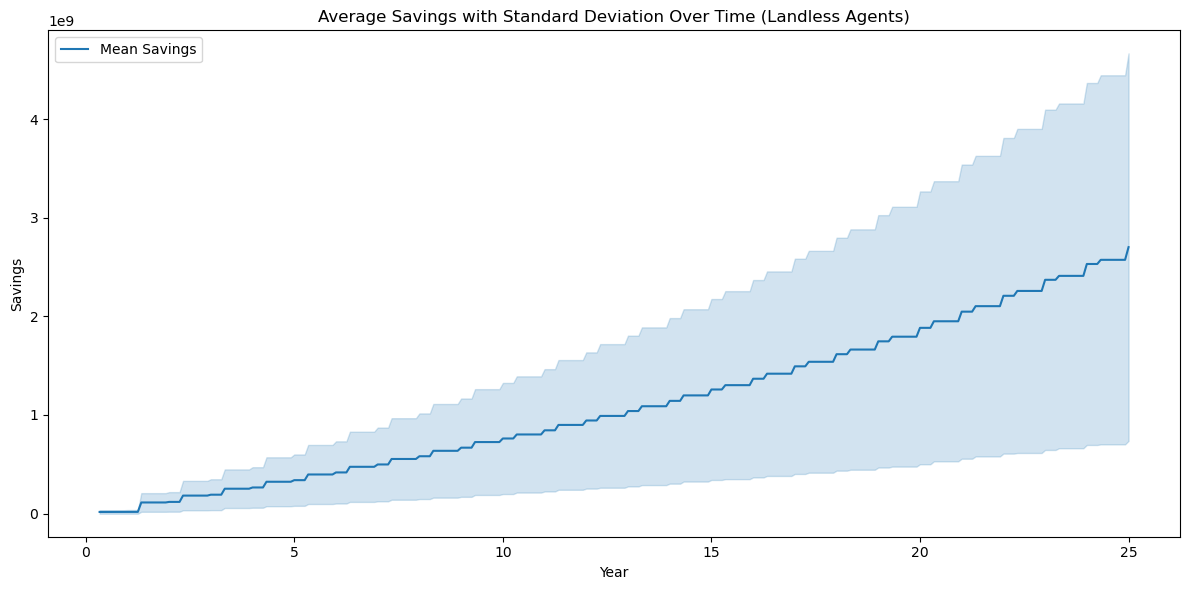

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter landless agents
landless_savings = agent_data[agent_data['too low income'].notna()].reset_index()
landless_savings['Year'] = landless_savings['Step'] / 12


# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    errorbar='sd',  
    estimator="mean",
    label="Mean Savings",
    ci="sd"  
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()



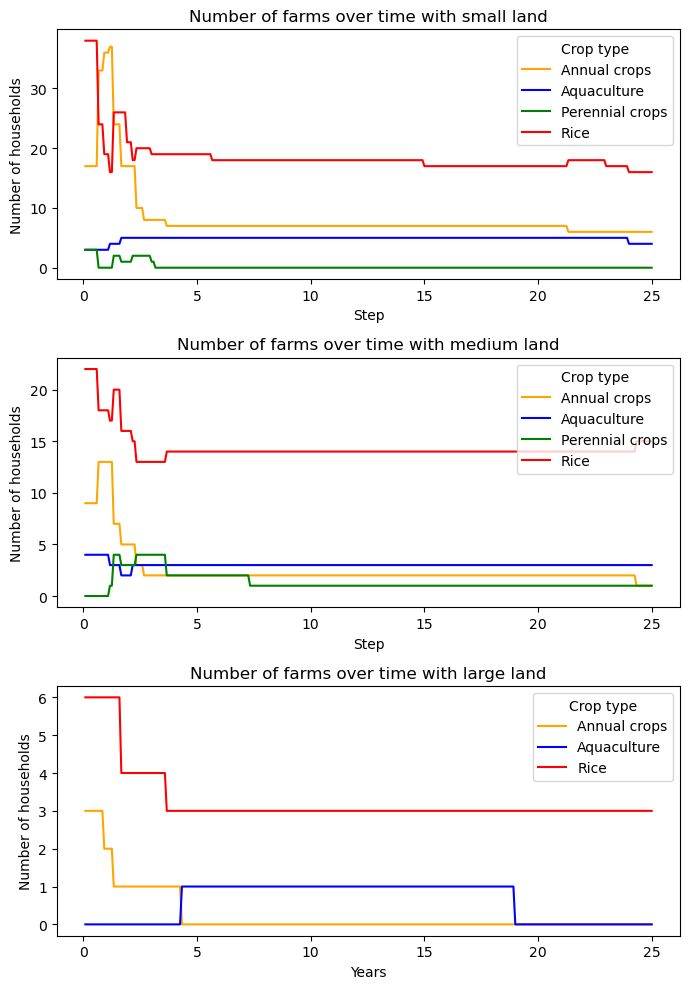

In [ ]:
agent_data_crops_per_land = agent_data[agent_data['Crop_type'].notna()]
agent_data_crops_per_land

import matplotlib.pyplot as plt

crop_colors = {
    "Annual crops": "orange",
    "Rice": "red",
    "Perennial crops": "green",
    "Aquaculture": "blue"  
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

for i, category in enumerate(['small', 'medium', 'large']):
    subsets = agent_data_crops_per_land[agent_data_crops_per_land["Land_category"] == category]
    if len(subsets) > 0:
        subsets = subsets.reset_index()
        subsets = subsets.groupby(['Step', "Crop_type"]).size().reset_index(name="count")
        subsets = subsets.pivot(index="Step", columns="Crop_type", values="count").fillna(0)
        subsets.index = subsets.index / 12 

        common_crops = [col for col in subsets.columns if col in crop_colors]
        color_list = [crop_colors[crop] for crop in common_crops]

        subsets[common_crops].plot(ax=axes[i], color=color_list)
        axes[i].set_title(f"Number of farms over time with {category} land")
        axes[i].set_ylabel("Number of households")
        axes[i].legend(title="Crop type")

axes[-1].set_xlabel("Years")
plt.tight_layout()
plt.show()


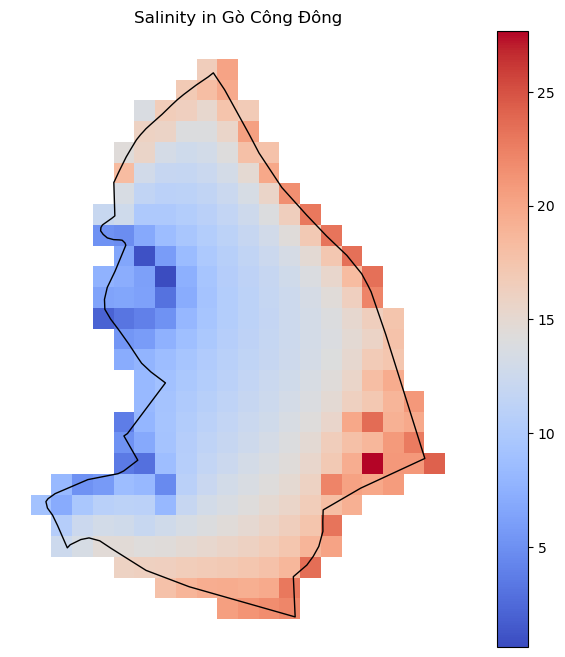

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

Aantal nodes per crop_type:
Annual crops: 29
Aquaculture: 7
Rice: 66
Perennial crops: 3
Unknown: 0
Aantal nodes per crop_type:
Annual crops: 7
Aquaculture: 7
Rice: 34
Perennial crops: 1
Unknown: 0


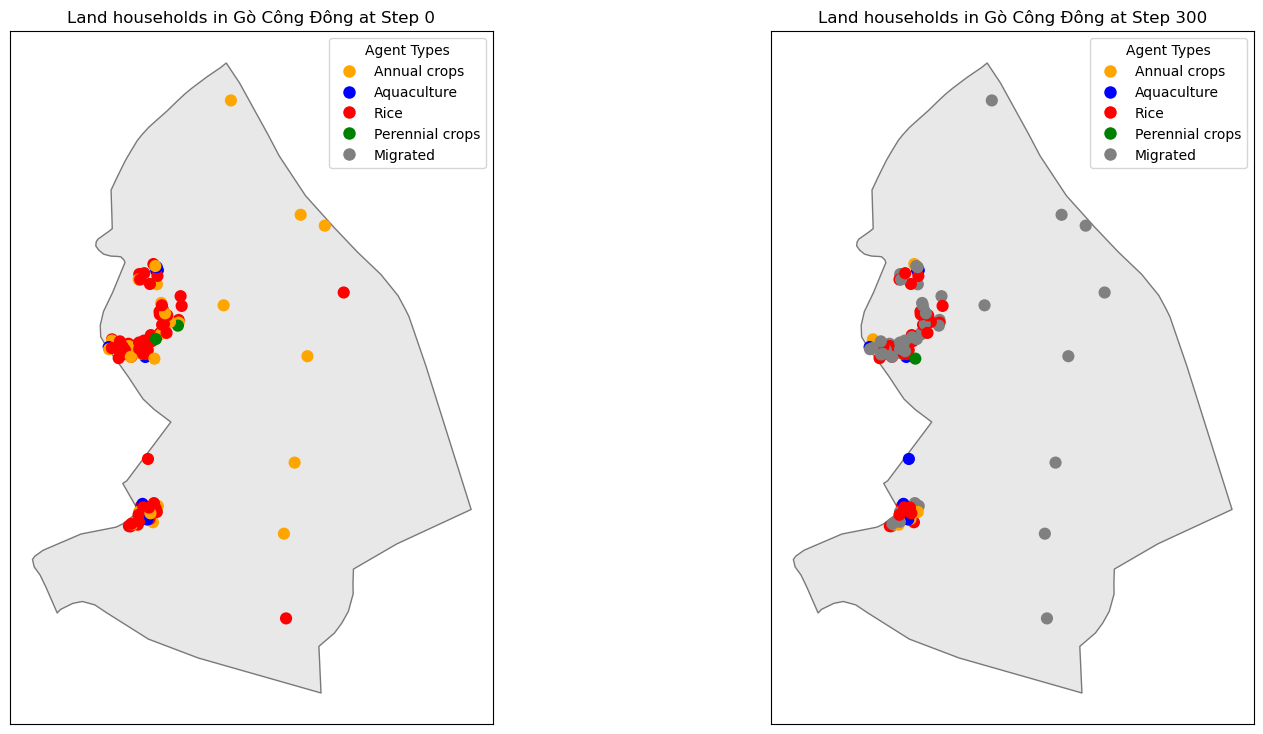

In [ ]:
from Model3 import Large_land_households, Middle_land_households, Small_land_households
from collections import Counter

def plot_network(ax, model):
    ax.clear()

    # Map node_id to agent
    node_to_agent = {agent.node_id: agent for agent in model.agents if isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))}
    
    # Tellen crop_types
    crop_counts = Counter()
    for agent in node_to_agent.values():
        crop = agent.crop_type
        if crop is not None:
            crop_counts[crop] += 1
        else:
            crop_counts['Unknown'] += 1

    print("Aantal nodes per crop_type:")
    for crop_type in ["Annual crops", "Aquaculture", "Rice", "Perennial crops", "Unknown"]:
        print(f"{crop_type}: {crop_counts.get(crop_type, 0)}")

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.crop_type == "Annual crops":
                colors_to_draw.append('orange')
            elif agent.crop_type == "Aquaculture":
                colors_to_draw.append('blue')
            elif agent.crop_type == "Rice":
                colors_to_draw.append('red')
            elif agent.crop_type == "Perennial crops":
                colors_to_draw.append('green')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent


    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Annual crops')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Aquaculture')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Rice')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Perennial crops')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Land households in {model.district} at Step {model.steps}", fontsize=12)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()

## 10 RUNS VOOR RESULTS


In [21]:
import copy
import pandas as pd
import random
import numpy as np

all_agent_data = []
all_model_data = []

for run in range(10):
    seed_value = run 
    random.seed(seed_value)
    np.random.seed(seed_value)

    model = RiverDeltaModel(seed=seed_value)  

    for j in range(300):
        model.step()

    agent_data_run = model.datacollector.get_agent_vars_dataframe()
    agent_data_run["Run"] = run
    all_agent_data.append(agent_data_run.reset_index())

    
    model_data_run = model.datacollector.get_model_vars_dataframe().copy()
    model_data_run['Run'] = run
    all_model_data.append(model_data_run.reset_index())


There are 0 agents unassigned!!
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
neighbor is rijk en neemt land over
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat ik geen geld had
ik ben gestopt omdat

KeyboardInterrupt: 

In [ ]:
all_model_data

[     index  Average_Livelihood  Num_household_members  Migrated_households  \
 0        0            0.000000                   1000                    0   
 1        1            0.000000                   1000                    0   
 2        2            0.000000                   1000                    0   
 3        3            0.000000                   1000                    0   
 4        4            0.000000                   1000                    0   
 ..     ...                 ...                    ...                  ...   
 296    296            0.735108                    757                   81   
 297    297            0.735108                    757                   81   
 298    298            0.735108                    757                   81   
 299    299            0.735108                    757                   81   
 300    300            0.735108                    751                   81   
 
      Migrated_members  Migrated_individuals  Died

In [ ]:
agent_data_all = pd.concat(all_agent_data, ignore_index=True)
agent_data_crops = agent_data_all[agent_data_all['Crop_type'].notna()]

grouped = (
    agent_data_crops
    .groupby(['Run', 'Step', 'Crop_type', 'Land_category'])
    .size()
    .reset_index(name='count')
)

mean_std = (
    grouped
    .groupby(['Step', 'Crop_type', 'Land_category'])['count']
    .agg(['mean', 'std'])
    .reset_index()
)

model_data_all = pd.concat(all_model_data, ignore_index=True)

grouped_model = (
    model_data_all
    .groupby(['index'])[['Migrated_households', 'Migrated_individuals']]
    .agg(['mean', 'std'])
)

grouped_model.columns = ['_'.join(col).strip() for col in grouped_model.columns.values]
grouped_model = grouped_model.reset_index()
grouped_model['Year'] = grouped_model['index'] / 12  

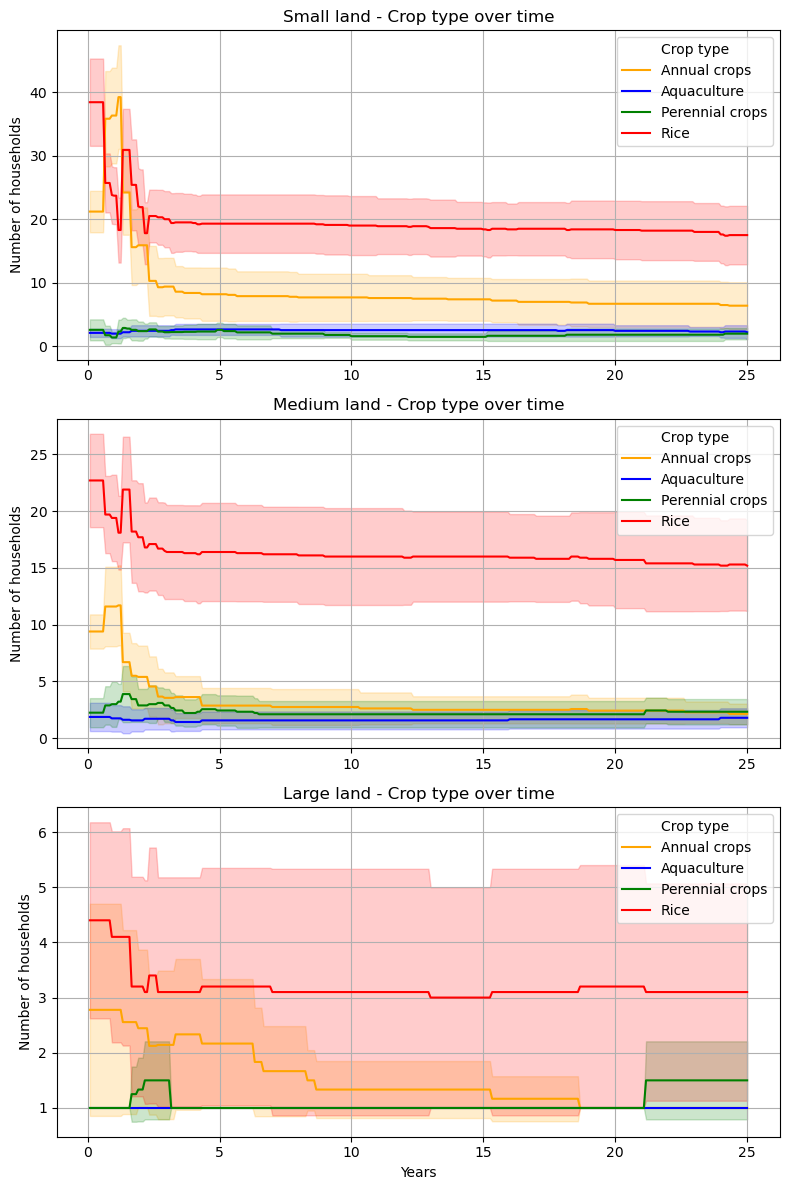

In [ ]:
import matplotlib.pyplot as plt

crop_colors = {
    "Annual crops": "orange",
    "Rice": "red",
    "Perennial crops": "green",
    "Aquaculture": "blue"
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
land_categories = ['small', 'medium', 'large']

for i, category in enumerate(land_categories):
    subset = mean_std[mean_std['Land_category'] == category]

    for crop in subset['Crop_type'].unique():
        crop_data = subset[subset['Crop_type'] == crop]
        steps = crop_data['Step'] / 12 

        axes[i].plot(steps, crop_data['mean'], label=crop, color=crop_colors.get(crop, None))
        axes[i].fill_between(
            steps,
            crop_data['mean'] - crop_data['std'],
            crop_data['mean'] + crop_data['std'],
            color=crop_colors.get(crop, None),
            alpha=0.2
        )

    axes[i].set_title(f"{category.capitalize()} land - Crop type over time")
    axes[i].set_ylabel("Number of households")
    axes[i].legend(title="Crop type")
    axes[i].grid(True)

axes[-1].set_xlabel("Years")
plt.tight_layout()
plt.show()


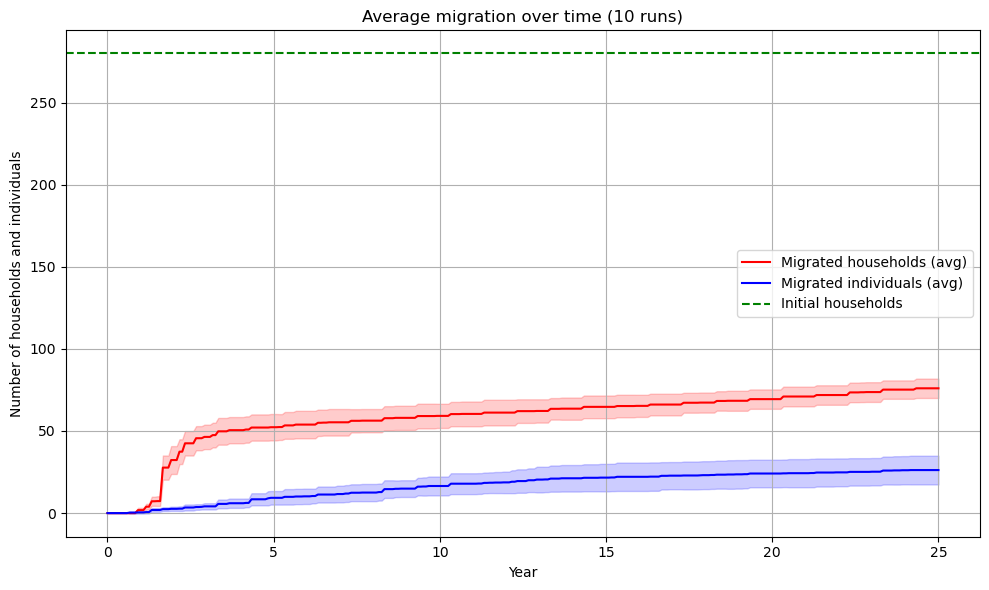

In [ ]:
migrated_data = grouped_model

start_households = model.start_households  

plt.figure(figsize=(10, 6))

plt.plot(migrated_data['Year'], migrated_data['Migrated_households_mean'], label='Migrated households (avg)', color='red')
plt.fill_between(
    migrated_data['Year'],
    migrated_data['Migrated_households_mean'] - migrated_data['Migrated_households_std'],
    migrated_data['Migrated_households_mean'] + migrated_data['Migrated_households_std'],
    color='red',
    alpha=0.2
)

plt.plot(migrated_data['Year'], migrated_data['Migrated_individuals_mean'], label='Migrated individuals (avg)', color='blue')
plt.fill_between(
    migrated_data['Year'],
    migrated_data['Migrated_individuals_mean'] - migrated_data['Migrated_individuals_std'],
    migrated_data['Migrated_individuals_mean'] + migrated_data['Migrated_individuals_std'],
    color='blue',
    alpha=0.2
)

plt.axhline(y=start_households, color='green', linestyle='--', label='Initial households')

plt.xlabel('Year')
plt.ylabel('Number of households and individuals')
plt.title('Average migration over time (10 runs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
grouped_model

,Step,Migrated_households_mean,Migrated_households_std,Migrated_individuals_mean,Migrated_individuals_std,Year
0,1.0,NaN,NaN,NaN,NaN,0.083333
1,2.0,NaN,NaN,NaN,NaN,0.166667
2,3.0,NaN,NaN,NaN,NaN,0.250000
3,4.0,NaN,NaN,NaN,NaN,0.333333
4,5.0,NaN,NaN,NaN,NaN,0.416667
...,...,...,...,...,...,...
295,296.0,NaN,NaN,NaN,NaN,24.666667
296,297.0,NaN,NaN,NaN,NaN,24.750000
297,298.0,NaN,NaN,NaN,NaN,24.833333
298,299.0,NaN,NaN,NaN,NaN,24.916667


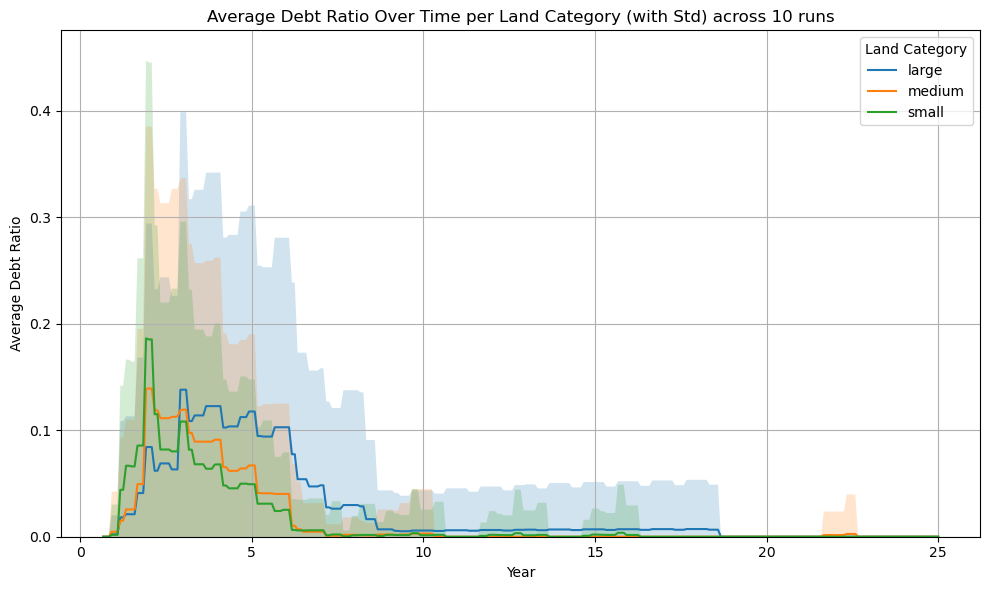

In [ ]:
debt_data = agent_data_all.copy()
debt_data = debt_data[debt_data['Debt ratio'].notna()]


grouped = (
    debt_data
    .groupby(['Step', 'Land_category'])['Debt ratio']
    .agg(['mean', 'std'])
    .reset_index()
)


grouped['Year'] = grouped['Step'] / 12

mean_pivot = grouped.pivot(index='Year', columns='Land_category', values='mean')
std_pivot = grouped.pivot(index='Year', columns='Land_category', values='std')


plt.figure(figsize=(10, 6))

for category in mean_pivot.columns:
    plt.plot(mean_pivot.index, mean_pivot[category], label=category)
    plt.fill_between(
        mean_pivot.index,
        mean_pivot[category] - std_pivot[category],
        mean_pivot[category] + std_pivot[category],
        alpha=0.2
    )

plt.title("Average Debt Ratio Over Time per Land Category (with Std) across 10 runs")
plt.xlabel("Year")
plt.ylabel("Average Debt Ratio")
plt.ylim(bottom=0)
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()


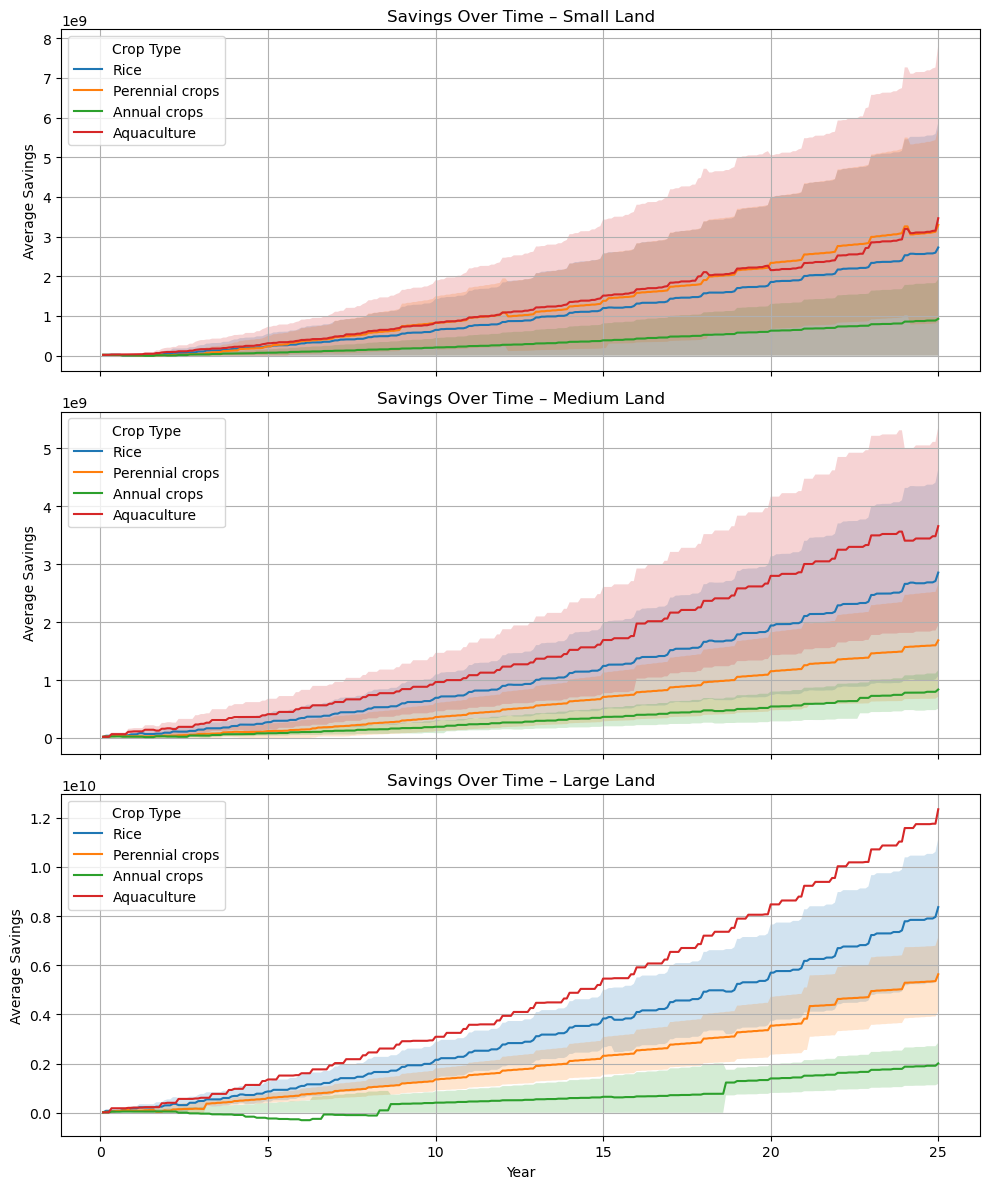

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_savings = agent_data_all.copy()  
df_filtered = df_savings.dropna(subset=['Crop_type', 'Land_category', 'Savings'])

df_filtered['Year'] = df_filtered['Step'] / 12


land_categories = ['small', 'medium', 'large']
crop_types = ['Rice', 'Perennial crops', 'Annual crops', 'Aquaculture']


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

for i, land in enumerate(land_categories):
    ax = axes[i]
    df_land = df_filtered[df_filtered['Land_category'] == land]
    
    for crop in crop_types:
        df_crop = df_land[df_land['Crop_type'] == crop]
        if df_crop.empty:
            continue

        grouped = df_crop.groupby('Year')['Savings']
        mean = grouped.mean()
        std = grouped.std()

        
        ax.plot(mean.index, mean.values, label=crop)
        ax.fill_between(
            mean.index,
            np.maximum(0, mean - std),  
            mean + std,
            alpha=0.2
        )
    
    ax.set_title(f"Savings Over Time – {land.capitalize()} Land")
    ax.set_ylabel("Average Savings")
    ax.grid(True)
    ax.legend(title="Crop Type")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


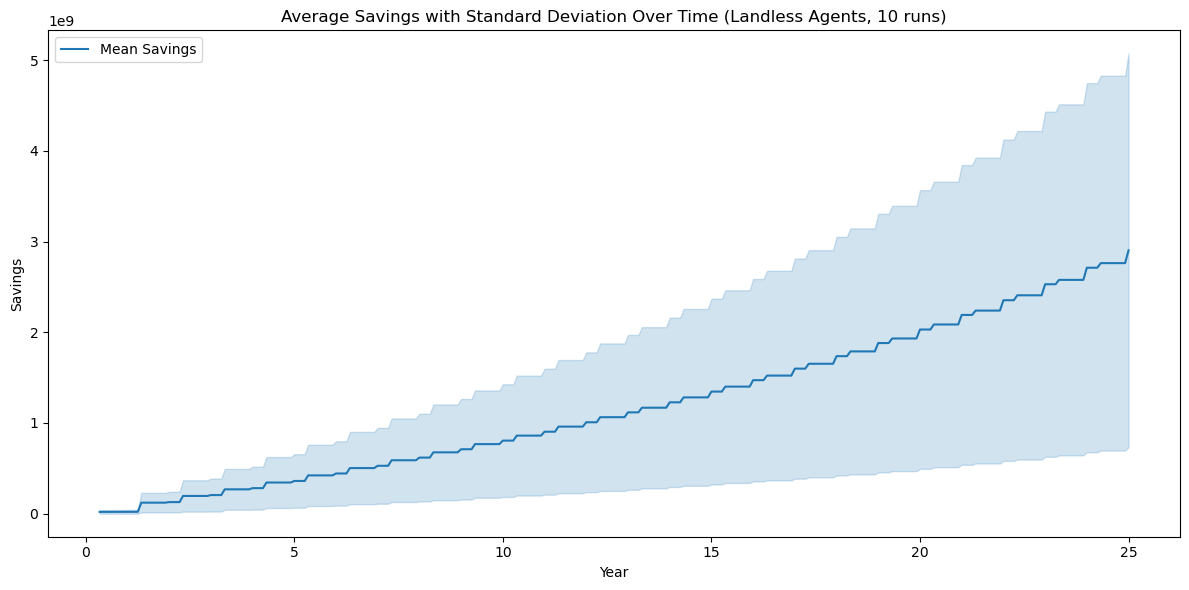

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

agent_data_all = pd.concat(all_runs, ignore_index=True)

landless_savings = agent_data_all[agent_data_all['too low income'].notna()].copy()
landless_savings['Year'] = landless_savings['Step'] / 12

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    estimator='mean',    
    ci='sd',             
    label="Mean Savings"
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents, 10 runs)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()
